In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import io

In [49]:



def plot_3d(Z1, Z2):
    Z1 = Z1[1:51, 1:51]
    ny1, nx1 = Z1.shape
    x1 = np.linspace(1, 51, nx1)
    y1 = np.linspace(1, 51, ny1)

    Z2 = Z2[1:51, 1:51]
    ny2, nx2 = Z2.shape
    x2 = np.linspace(1, 51, nx2)
    y2 = np.linspace(1, 51, ny2)

    fig = plt.figure(figsize=(12,4))
    
    X1, Y1 = np.meshgrid(x1, y1)
    ax1 = fig.add_subplot(131, projection="3d")
    ax1.set_proj_type('ortho')
    ax1.plot_surface(X1, Y1, Z1, cmap="viridis")
    ax1.view_init(elev=45, azim=-75)

    
    X2, Y2 = np.meshgrid(x2, y2)
    ax2 = fig.add_subplot(132, projection="3d")
    ax2.set_proj_type('ortho')
    ax2.plot_surface(X2, Y2, Z2, cmap="cividis")
    ax2.view_init(elev=45, azim=-75)

    ax3 = fig.add_subplot(133, projection="3d")
    ax3.set_proj_type('ortho')
    ax3.plot_surface(X1, Y1, Z1, cmap="viridis")
    ax3.plot_surface(X2, Y2, Z2, cmap="cividis")
    ax3.view_init(elev=45, azim=-75)
    
    plt.show()


In [50]:
def plot_NC(time):
    N = grid[time,:,:,0]
    C = grid[time,:,:,1]
    plot_3d(N,C)

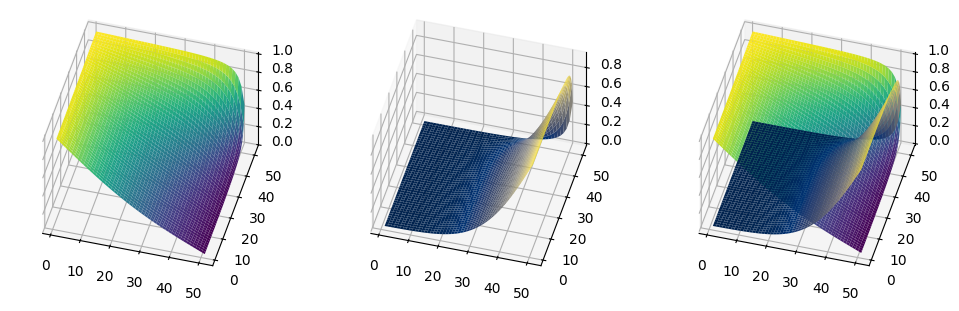

In [56]:
exp1 = np.load('dataNNC/exp10.npy', allow_pickle=True).item()
grid = exp1['NCV_grid']
plot_NC(200)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def plot_3d_static(Z1, Z2, ax1, ax2, ax3):
    # slice to interior
    Z1 = Z1[1:51, 1:51]
    Z2 = Z2[1:51, 1:51]

    ny, nx = Z1.shape
    x = np.linspace(1, 51, nx)
    y = np.linspace(1, 51, ny)
    X, Y = np.meshgrid(x, y)

    # N
    ax1.clear()
    ax1.set_proj_type('ortho')
    ax1.plot_surface(X, Y, Z1, cmap="viridis")
    ax1.view_init(elev=45, azim=-75)
    ax1.set_title("N")
    ax1.set_axis_off()

    # C
    ax2.clear()
    ax2.set_proj_type('ortho')
    ax2.plot_surface(X, Y, Z2, cmap="cividis")
    ax2.view_init(elev=45, azim=-75)
    ax2.set_title("C")
    ax2.set_axis_off()

    # Combined
    ax3.clear()
    ax3.set_proj_type('ortho')
    ax3.plot_surface(X, Y, Z1, cmap="viridis")
    ax3.plot_surface(X, Y, Z2, cmap="cividis")
    ax3.view_init(elev=45, azim=-75)
    ax3.set_title("Combined")
    ax3.set_axis_off()


def animate_NC(grid, save_path=None, fps=20):
    T = grid.shape[0]//2

    fig = plt.figure(figsize=(18, 5))
    ax1 = fig.add_subplot(131, projection="3d")
    ax2 = fig.add_subplot(132, projection="3d")
    ax3 = fig.add_subplot(133, projection="3d")

    def update(t):
        N = grid[t, :, :, 0]
        C = grid[t, :, :, 1]
        plot_3d_static(N, C, ax1, ax2, ax3)
        fig.suptitle(f"t = {t}", fontsize=14)

    anim = FuncAnimation(fig, update, frames=T, interval=50, blit=False)

    if save_path:
        writer = FFMpegWriter(fps=fps)
        anim.save(save_path, writer=writer)
        print(f"Saved animation -> {save_path}")

    return anim


Saved animation -> diffusion.mp4


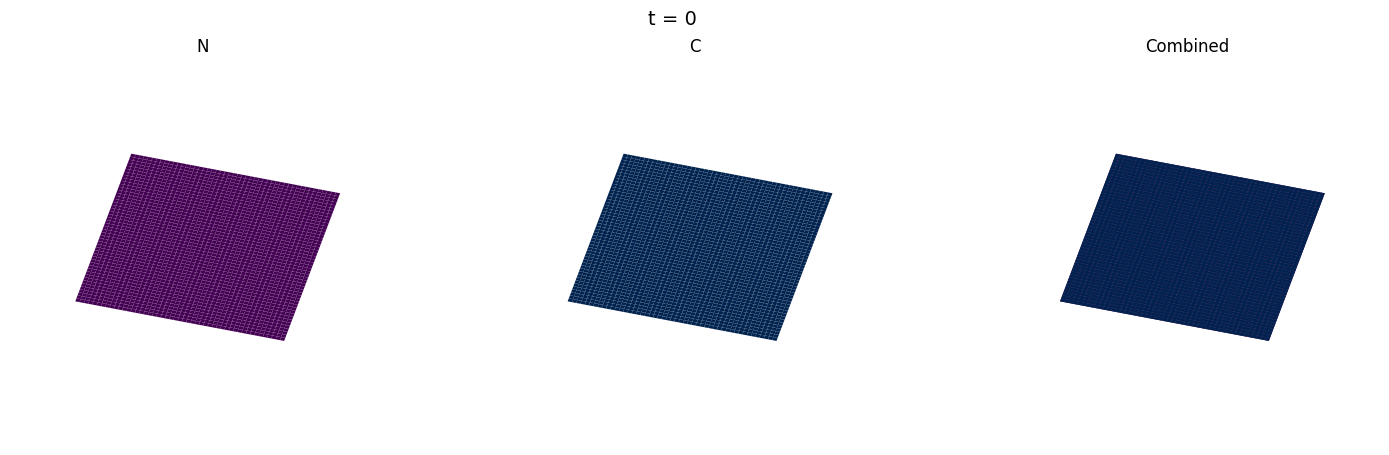

In [58]:
exp1 = np.load('dataNNC/exp10.npy', allow_pickle=True).item()
grid = exp1['NCV_grid']
animate_NC(grid, save_path="diffusion.mp4")

OSError: [Errno 22] Invalid argument

D:\codesoftware\Python\Python310\lib\site-packages\matplotlib\animation.py:872: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



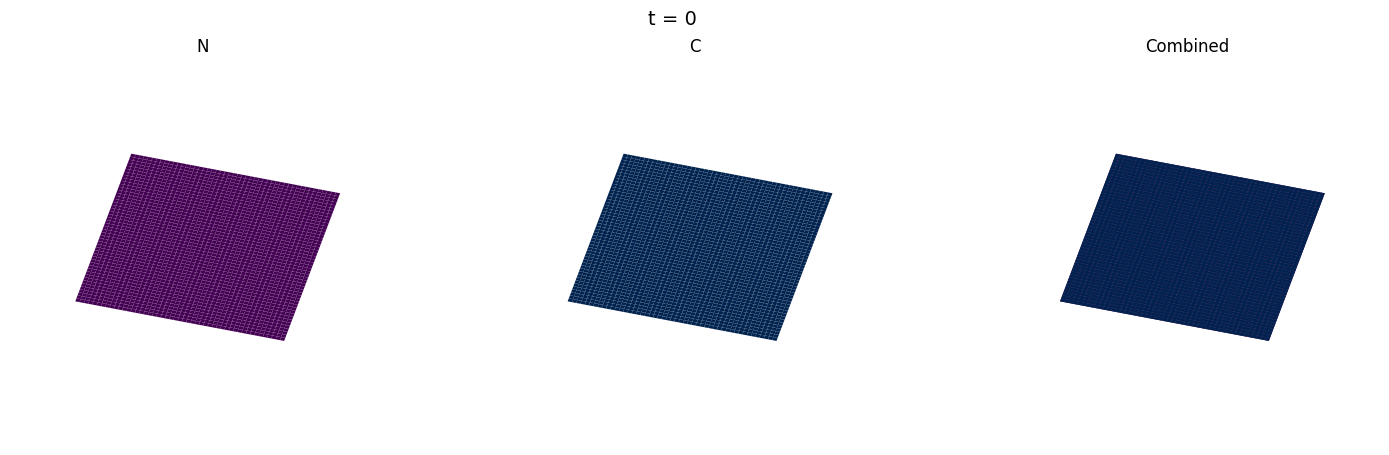

In [62]:
exp1 = np.load('dataNNC/exp11.npy', allow_pickle=True).item()
grid = exp1['NCV_grid']
animate_NC(grid, save_path="diffusion2.mp4")